## Rate equations

The **rate law** or **rate equation** for a chemical reaction is an equation that links the *initial* or *forward reaction rate* with the *concentrations* or *pressures* of the reactants and constant parameters (normally rate coefficients and partial reaction orders).

The **kinematic theory** studies how the reactants and products of a chemical reaction appear/disappear in terms of their velocity.

To this purpose we need to model (under reasonable assumptions) the chemical reactions using (a set of) differential equations.

The first law of the kinematic theory is called **law of mass action** (LAM): this law is based on the assumption that a large number of small particles (with an individual random kinematic motion) could be bring back to a "low resolution" model.

In particular, the LAM states that the **velocity** of a chemical reaction is *proportional* to the concentration of the reactants and products, i.e

$$
\alpha A + \beta B \cdots \rightleftharpoons \cdots \sigma S + \theta T
$$

where $\alpha, \beta, \cdots$ are the numbers of molecules of types $A, B, \cdots$.

Using the symbol $[]$ to identify the **chemical concentration** of each species, using the LAM we can determine the set of **constants** which regulates the appearence/disappearence of the concetrantions

$$
k_+ [A]^\alpha [B]^\beta = \mbox{rate of (appearence) reactants}
$$
$$
k_- [S]^\sigma [T]^\tau = \mbox{rate of (disappearence) products}
$$


Using these reaction rates we can define the **equilibrium constant** of the reaction as

$$
K = \frac{k_+}{k_-} = \frac{[S]^\sigma [T]^\tau \cdots}{[A]^\alpha [B]^\beta \cdots}
$$

**Note:** This law is valid **only** if the number of particles/molecules are large enough ($\equiv N_A$), since it based on the assumption of homogeneous concentrations (it derives from a physical-statistical description of the system).

We can broadly divide the physycal-statistical chemical reactions into two categories:

* **reversible**

$$
A + A + B \rightarrow A_2 B \quad \Rightarrow \quad \frac{d[A_2B]}{dt} = k [A]^2 [B]
$$

* **irreversible**

$$
A + A + B \rightarrow C + D \quad \Rightarrow \quad \frac{d[C]}{dt} = k_{AB} [A]^2 [B] - k_{CD} [C][D]
$$

## Zero Order kinetic

Zero-order reaction is the simplest case.

For zero-order reactions, the reaction rate is **independent** of the concentration of a reactant, so that changing its concentration has no effect on the speed of the reaction. 

Thus, the concentration changes *linearly* with time. 
This may occur when there is a bottleneck which limits the number of reactant molecules that can react at the same time, for example if the reaction requires contact with an enzyme or a catalytic surface.

$$
R \xrightarrow[]{k} P \quad \Rightarrow \quad v = \frac{d[A]}{dt} = -k
$$

The reaction above is an **irreversible** reaction and since there is not dependency on the concentrations we can conclude that the appearence rate of the product $P$ is equal to the disappearence rate of the reactant $R$, i.e all the reactant becomes product or (mathematically)

$$
\frac{d[R]}{dt} = - \frac{d[P]}{dt} = -k
$$

integrating this equation we obtain the solution

$$
P(t) = P_0 + k \cdot t
$$

which a motion at **constant velocity** (a *linear system*) in which the concentration of the product increases linearly with the time.

> Many enzyme-catalyzed reactions are zero order, provided that the reactant concentration is much greater than the enzyme concentration which controls the rate, so that the enzyme is saturated. 

> For example, the biological oxidation of ethanol to acetaldehyde by the enzyme liver alcohol dehydrogenase (LADH) is zero order in ethanol.

Let's try to implement the above consideration into a Python code.

First of all we have to define our differential equation as a classical function of Python.

>⚠️**Note:** A differential equation is essentially a derivative function.
Since we are working into a discrete system (PC) we have to re-think the equation into its discrete form, using the formal definition

$$
f'(x) = \lim_{\Delta x \rightarrow 0}\frac{\Delta y}{\Delta x} = \lim_{\Delta x \rightarrow 0}\frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

In [2]:
import numpy as np

def zero_order (x, y0, alpha):
    '''
    Zero order kinetic
    
    Parameters
    ----------
        x : array-like
            List of time points
        
        y0 : float
            Initial condition of the reactant
        
        alpha : float
            Constant of the reaction
    
    Returns
    -------
        y : array-like
            The resulting product array    
    '''
    # determine the interval as diff
    dx = x[1] - x[0] # Note: we are assuming it is constant!!
    
    # Create an empty buffer to store our results
    # Its lenght must be greater than x since we want to set
    # the initial condition!
    y = np.empty(shape=(len(x) + 1, ), dtype=float)
    # Set the initial condition
    y[0] = y0
    
    # Integrate the equation using the Euler method
    for i, _ in enumerate(x):
        y[i + 1] = y[i] * (1. - alpha * dx)

    return y[:-1] # skip the latest point

Now we can set a series of initial parameter and use them to simulate our model.

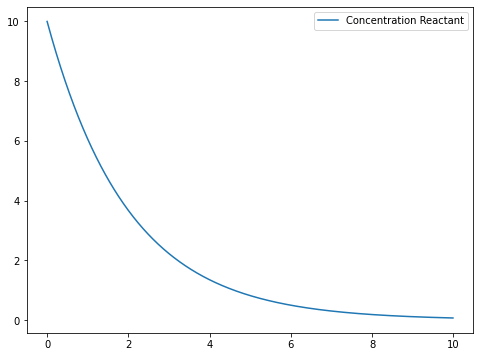

In [23]:
import pylab as plt

# initial conditions
y0 = 10
alpha = .5
iterations = 1000
dt = 1e-2

x = np.arange(0, iterations*dt, dt)
R = zero_order(x, y0, alpha)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(x, R, label='Concentration Reactant')
ax.legend()

## 1st Order kinetic

A first order reaction depends on the concentration of only one reactant (a unimolecular reaction, i.e a reactant with a concentration exponent equal to 1). 

Other reactants can be present, but each will be zero order. 

The rate law for such a reaction is 

$$
\frac{d[R]}{dt} = -\frac{d[P]}{dt} = -k[R]
$$

The solution of this differential equation is immediately given by

$$
R(t) = R_0 e^{(-k\cdot t)}
$$

i.e an exponential disappearance of the reactant.

From this equation we can easily extract the concentration of the product along the time considering that the **total concentration** must be **costant**, i.e

$$
[R + P] = [R] + [P]
$$

aka <span style="color:blue">*omnia mutantur, nihil interit*</span>

>⚠️**Note:** The two equations are not independent but one is the "opposite" of the other and thus there must be a conservation law!

Substituing the total concentration equation we have a system with 2 equations with 2 unknowns, from which we can determine the kinematic of the product concentration as

$$
P(t) = \text{Tot} - R(t) = \text{Tot} + (P_0 - \text{Tot}) \cdot e^{-k \cdot t}
$$

which is a (positive) exponential behavior.

> **Note:** When $P_0 = 0$ the above equation lead to $P(t) = \text{Tot} \cdot (1 - e^{-k\cdot t})$ which represents a positive exponential growth.

A classical example of first order kinetic is the **inter-conversion** system (aka **reversible reaction**)

$$
R \rightleftharpoons P
$$

which lead to this couple of equations

$$
\frac{d[R]}{dt} = -k_f \cdot [R] + k_b \cdot [P]
$$
$$
\frac{d[P]}{dt} = k_f \cdot [R] - k_b \cdot [P]
$$

where $k_f$ and $k_b$ represent the two constants of the reaction, *forward* and *backward* respectively.

Let's try to implement these couple of equations in Python.

We will use the same considerations proposed in the previous case, but in now we have to manage two equations (two arrays) at the same time.

In [24]:
from scipy.integrate import odeint

def conversion (y, t, kf, kb):

    product, reagents = y
    dp =  kf * reagents - kb * product
    dr = -kf * reagents + kb * product

    return (dp, dr)

In this case we will use the pre-built function provided by the `scipy` package for an accurate integration of these equations.

The required arguments are:
* the integration step function
* the initial condition
* the time array
* the model parameters

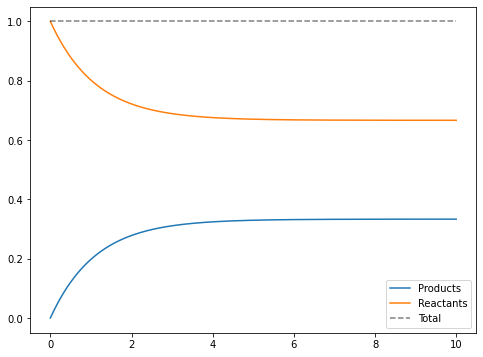

In [26]:
# initial conditions
y0 = (0, 1.)
kf, kb = (.3, .6)

time = np.linspace(0, 10, 1000)
res = odeint(conversion, y0, time, args=(kf, kb))
total = np.sum(res, axis=1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(time, res[:, 0], label='Products')
ax.plot(time, res[:, 1], label='Reactants')
ax.plot(time, total, 'k--', label='Total', alpha=.5)
ax.legend()

This plot well highlights one of the main characteristics of the reversible reactions: in these reactions the combination of products and reactants does not go to a completement *but* it goes to an **equilibrium**.

From a kinetic point-of-view this behavior explains the coexistance of two elementary reactions (forward and backward) completely independent.

For this reason the reaction is also called as **inter-conversion**, i.e the total velocity is given by the difference of the velocities of the two reactions.

Thus, given the following **inter-conversion** equation

$$
A + B \underset{k_b}{\stackrel{k_f}{\rightleftharpoons}} C
$$

The velocities of the two reactions can be extimated as

$$
v_1 = -\frac{d[A]}{dt} = - \frac{d[B]}{dt} = k_f [A][B]
$$
$$
v_2 = -\frac{d[C]}{dt} = k_b [C]
$$

and the total velocity is given by

$$
v_{\text{Tot}} = k_f [A][B] - k_b [C]
$$

In this situation we can define a **stationary state** when the two reaction rates will be equal

$$
k_f [A][B] = k_b [C] \quad \Rightarrow \quad k_c = \frac{k_f}{k_b}
$$

and the time required to reach this state will be given by

$$
\tau = \frac{1}{k_f + k_b}
$$

from which is estimated the classification between *fast* and *slow* reactions.

> **Example:** An example of this kind of reaction is given by the photoreceptor cells of the retina which transform the (input) light signals into (output) elettrica signals.
In the biological field, an incoming signal transformed into another type of signal is modelled by a pluri-molecular kinetic reaction.

> **Example:** A second example is given by the immunoglobulins (antibodies) of the immune system.
The immune system is an ensemble of cells which produce proteins (immunoglobulins) and lymphocytes at the presence of antigen.
The antibodies are exposed on the surface of the cells as receptors, aka "controllers" who check the adherence of extern antigen: when the antigen is combined with the receptor an immunitary response is made.
In these terms we can model the bi-molecular kinetic reaction of the receptor (A) and the antigen (B) with these equations.

## Michaelis Menten

The Michaelis-Menten (MM) kinetic describes the rate of a chemical reaction catalized by enzymes, varying its concentration and the concentration of the substrate.

In biochemistry, Michaelis–Menten kinetics is one of the best-known models of enzyme kinetics.

It is named after German biochemist Leonor Michaelis and Canadian physician Maud Menten.

>**Def:** Catalysis is the process of increasing the rate of a chemical reaction by adding a substance known as a catalyst.
Catalysts are not consumed in the catalyzed reaction but can act repeatedly.

>**Def:** Enzymes are proteins that act as biological catalysts (biocatalysts). 
Catalysts accelerate chemical reactions. 
The molecules upon which enzymes may act are called substrates, and the enzyme converts the substrates into different molecules known as products. 

The MM kinetic is model as

$$
E + S \underset{k_b}{\stackrel{k_f}{\rightleftharpoons}} ES \xrightarrow[]{k_c} E + P
$$

where $k_c$ is the **catalytic constant** which regulates the rate of the enzymatic reaction.

The link between enzyme and substrate allows to reach the activation energy of the (*irreversible*) reaction.

The enzyme is highly specific for its substrate and their link is called **lock and key** mechanism.

**TODO**: insert example code here

## Toggle Switch

## A more advanced model - Brusselator

The Brusselator is a theoretical model for a type of autocatalytic reaction. 

The Brusselator model was proposed by Ilya Prigogine and his collaborators at the Université Libre de Bruxelles.
It is a portmanteau of Brussels and oscillator. 

It is characterized by the reactions 

$$
\quad A\quad \quad \rightarrow \quad\quad X
$$
$$
B + X\quad \quad \rightarrow \quad\quad Y + C
$$
$$
2X + Y \quad \rightarrow \quad\quad 3X
$$
$$
\quad X\quad \quad \rightarrow \quad\quad D
$$

We can study the model assuming that $A$, $B$, $C$ and $D$ concentrations remain constants. 

In this way the only variables of the system are $X$ and $Y$.

The equations can be rewritten as

$$
\frac{d[X]}{dt} = +V_1  \quad\quad\quad  \frac{d[Y]}{dt} =\quad0
$$
$$
\frac{d[X]}{dt} = -V_2  \quad\quad\quad  \frac{d[Y]}{dt} = +V_2
$$
$$
\frac{d[X]}{dt} = +V_3  \quad\quad\quad  \frac{d[Y]}{dt} = -V_3
$$
$$
\frac{d[X]}{dt} = -V_4  \quad\quad\quad  \frac{d[Y]}{dt} =\quad0
$$

Then, following the LAM and combining the previous equations we obtain

$$
\frac{d[X]}{dt} = [A] - [B]x + [X]^2[Y] - [X]
$$
$$
\frac{d[Y]}{dt} = [B]x - [X]^2[Y]
$$

where, for convenience, the rate constants have been set to 1. 

First of all we can study the stability points of this system of equations.

This can be achieved evaluating the derivative equation (posing their values to null)

$$
A - Bx + x^2y - x = 0
$$
$$
Bx - x^2y = 0
$$

The solution of this system (very easy) lead to a single **critial point**

$$
(A, \frac{B}{A})
$$

and inserting this point into the equations we obtained the Jacobian Matrix of the system

$$
J = \begin{bmatrix} B - 1 & A^2 \\ -B & -A^2 \end{bmatrix}
$$

from which we can evaluate the characteristic equation (aka determinant)

$$
L^2 + (1 - B + A^2) L + A^2 = 0
$$

This analysis lead to a couple of eigenvectors of the $J$ matrix which depend by the following equations

$$
1 - B + A^2 \quad\quad\quad \Delta = (1 - B + A^2)^2 - 4 A^2
$$

Now it is time to move our analysis from the math to the Python code.

We aim to visualize the solution of the system varying the two parameters $A$ and $B$.

First of all, we have to define the equations of our system and the integration algorithm (in this example we will use a Runge-Kutta 4th, ref. [here](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)).

In [27]:
Vx = lambda x, y, A, B : A + x*x*y - B*x - x
Vy = lambda x, y, A, B : B*x - x*x*y

def RK4 (x, y, dt, A, B):

    kx1 = Vx(x, y, A, B)
    ky1 = Vy(x, y, A, B)

    kx2 = Vx(x, y, A, B) + dt * .5 * ky1
    ky2 = Vy(x, y, A, B) - dt * .5 * kx1

    kx3 = Vx(x, y, A, B) + dt * .5 * ky2
    ky3 = Vy(x, y, A, B) - dt * .5 * kx2

    kx4 = Vx(x, y, A, B) + dt * ky3
    ky4 = Vy(x, y, A, B) - dt * kx3

    x_new = x + dt / 6 * (kx1 + 2. * kx2 + 2. * kx3 + kx4)
    y_new = y + dt / 6 * (ky1 + 2. * ky2 + 2. * ky3 + ky4)

    return (x_new, y_new)

Now we can declare our initial conditions and move to the system integration.

In [28]:
# initial conditions
A, B = (.5, 2.)

dt = 1e-2
iterations = 10000

time = np.linspace(0, dt * iterations, iterations)
x = np.empty(shape=(iterations + 1), dtype=float)
y = np.empty(shape=(iterations + 1), dtype=float)

x[0] = 1.6
y[0] = 2.8

for i in range(0, iterations):
    x[i + 1], y[i + 1] = RK4(x[i], y[i], dt, A, B)

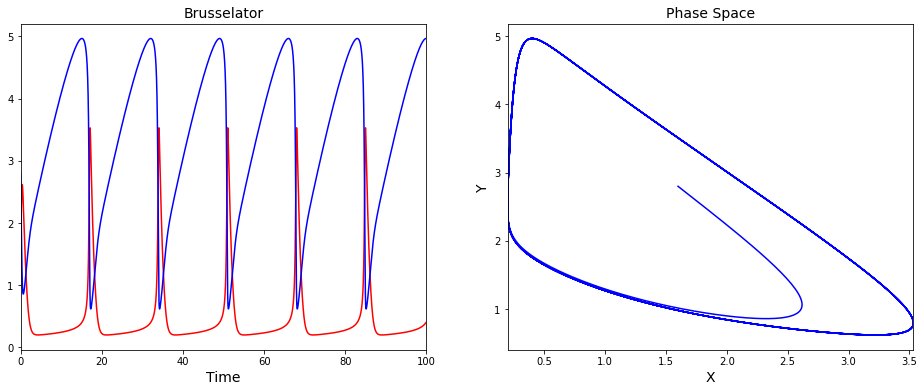

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('', fontsize=14)
ax1.set_title('Brusselator', fontsize=14)

l1, = ax1.plot(time, x[:-1], color='r', label='x')
l2, = ax1.plot(time, y[:-1], color='b', label='y')

ax2.set_xlabel('X', fontsize=14)
ax2.set_ylabel('Y', fontsize=14)
ax2.set_title('Phase Space', fontsize=14)

l3, = ax2.plot(x, y, color='b')

ax1.margins(x=0)
ax2.margins(x=0)

Now we can see how this system changes using different (and critical) parameters of $A$ and $B$.

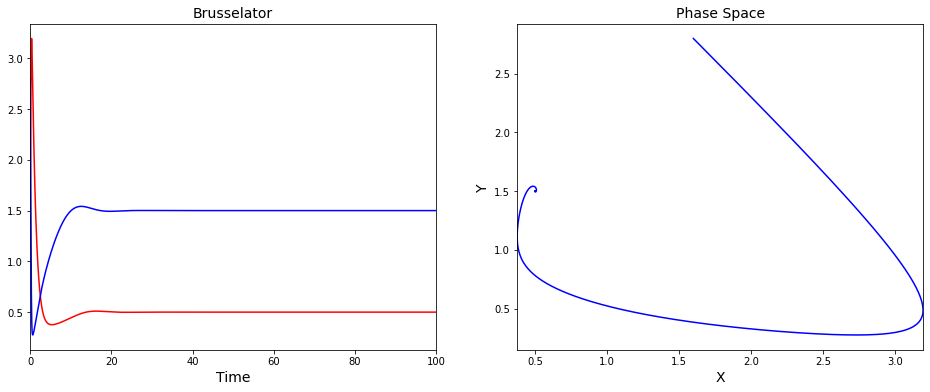

In [30]:
# 1st critical point
A = .5
B = 1 - A**2

dt = 1e-2
iterations = 10000

time = np.linspace(0, dt * iterations, iterations)
x = np.empty(shape=(iterations + 1), dtype=float)
y = np.empty(shape=(iterations + 1), dtype=float)

x[0] = 1.6
y[0] = 2.8

for i in range(0, iterations):
    x[i + 1], y[i + 1] = RK4(x[i], y[i], dt, A, B)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('', fontsize=14)
ax1.set_title('Brusselator', fontsize=14)

l1, = ax1.plot(time, x[:-1], color='r', label='x')
l2, = ax1.plot(time, y[:-1], color='b', label='y')

ax2.set_xlabel('X', fontsize=14)
ax2.set_ylabel('Y', fontsize=14)
ax2.set_title('Phase Space', fontsize=14)

l3, = ax2.plot(x, y, color='b')

ax1.margins(x=0)
ax2.margins(x=0)

## Chemical Master Equation approach

In physics, chemistry and related fields, master equations are used to describe the time evolution of a system that can be modelled as being in a probabilistic combination of states at any given time and the switching between states is determined by a transition rate matrix. 

The equations are a set of differential equations – over time – of the probabilities that the system occupies each of the different states. 

In each time step the system could lies only in one of the possible **discrete** state and its transition is modeled by a statistical/probabilistical approach.

There are some cases in which the probabilistic evolution of the system is prefered, expecially in the biological field: single cell experiments does not lead to equal results, but all of them could be grouped together using probability distributions.

Particular interesting are also the systems in which the number of individuals is not large enough for a global description: in these cases the system kinetic shows too much statistical fluctuations to be modeled using the kinetic theory.

In physic the concept of *noise* is a well studied research field but in the biological field it could be difficulty interpreted (biological variability or individual variability).

For all these cases the usage of the **chemical master equation** (CME) can help us to reach a good description of the system.

The most common (mathematical) form of the CME is given by

$$
\frac{d\vec{P}}{dt} = A \vec{P}
$$

where $\vec{P}$ represents a vector of states and $A$ is the transition/connection matrix.

* When the connections between the possible states of the system are independent on time, then the MCE represents a **kinetic scheme** and we talk about a **Markov process**: in this case every jump from a state to another has an exponential probability to occur.

* When the connections between the possible states depend on time ($A_{ij} = A_{ij}(t)$) we have a **non-stationary process**.

The *stationary solution* of the CME is a *distribution of probabilities* and thus it is a function with many variables (which can help to easily fit the experimental data).

The link between the CME and the LAM is given by the limit on the reaction volume, i.e

$$
\text{CME} \quad\quad \xrightarrow[]{V\rightarrow \infty} \quad\quad LAM
$$

which corresponds to increase the number of molecules involved in the reaction.